In [86]:
# import the modules
import numpy as np
import geopandas as gp
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline
%matplotlib inline
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [39]:
# seed the random
myseed = np.random.seed(201510)
myseed

In [40]:
# load the data with GeoDataFrame
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUI2015')+'/HW5/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

In [183]:
# have a simple visual of the data
#print nrg.columns
#print nrg.describe()

In [184]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUI2015')+'/HW5/Manhattan/MNMapPLUTO.shp')
#print bsize.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131bad8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a5eb0d0>]], dtype=object)

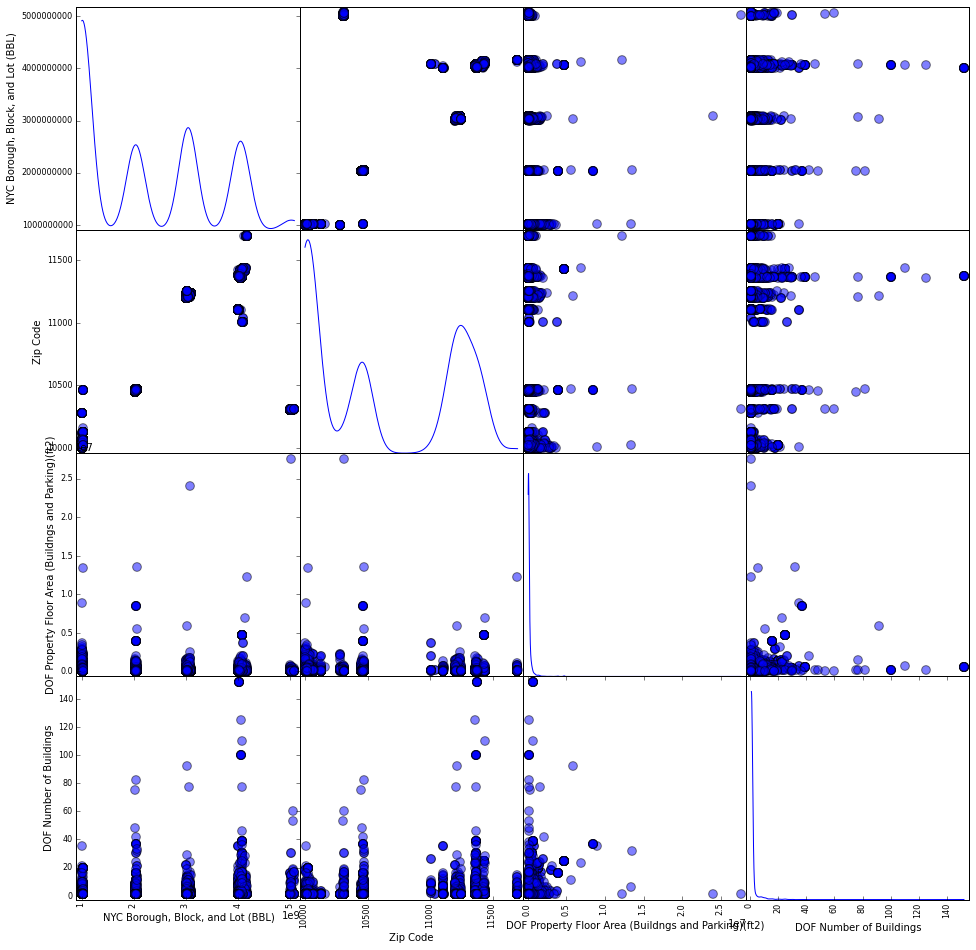

In [42]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [43]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

Create the array here:

In [44]:
nrg['energy'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['area'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

In [173]:
#nrg.energy.astype(float)
#nrg.area.astype(float)

In [174]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

In [175]:
# merge the table file with the shape file
BBLmerge = pd.merge(nrg, bsize, on='BBL')

In [176]:
BBLmerge['Building Energy Consumption'] = BBLmerge['energy']*BBLmerge['area']

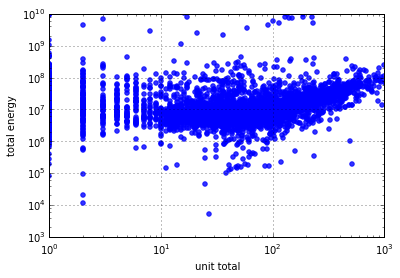

In [177]:
BBLmerge.plot(kind='scatter', x='UnitsTotal', y='Building Energy Consumption', color='b', alpha=0.8, loglog=True)
#plt.scatter(x=np.log10(BBLmerge['UnitsTotal']),y=np.log10(BBLmerge['Building Energy Consumption']),linestyle='o', color='b', alpha=0.8)
pl.xlim([1, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('unit total')
pl.ylabel('total energy')
pl.grid()
pl.legend()

In [178]:
BBLcut = BBLmerge[(BBLmerge['Building Energy Consumption']>=1000)&(BBLmerge['Building Energy Consumption']<1e+10)
                  & (BBLmerge['UnitsTotal']>=1)&(BBLmerge['UnitsTotal']<1000)]

In [179]:
X = sm.add_constant(np.log10(BBLcut['UnitsTotal']))
Y = np.log10(BBLcut['Building Energy Consumption'])
myfit = sm.OLS(Y, X, missing='drop').fit() # ignores entires where x or y is NaN
print myfit.params
myfit.summary()

const         6.914340
UnitsTotal    0.074822
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Building Energy Consumption   R-squared:                       0.011
Model:                                     OLS   Adj. R-squared:                  0.011
Method:                          Least Squares   F-statistic:                     56.32
Date:                         Tue, 13 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                                 23:23:03   Log-Likelihood:                -3378.5
No. Observations:                         4956   AIC:                             6761.
Df Residuals:                             4954   BIC:                             6774.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9143      0.018    387.562      0.000         6.879     6.949
UnitsTotal     0.0748      0.010      7.505      0.000         0.055     0.094
==============================================================================
Omnibus:                     1218.354   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10046.460
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                       9.716   Cond. No.                         6.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5


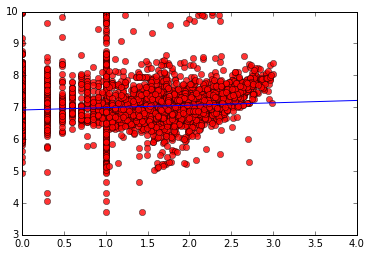

In [180]:
#plot the fit line
xline = np.arange(0,5)
yline = myfit.params[1]*xline + myfit.params[0]
print len(xline)
plt.plot(X,Y,'ro', alpha = 0.8)
#plot the dots
plt.plot(xline, yline, 'b', )

In [181]:
# the other way around
